# Exercise 1: Business cycle correlations

For this exercise, you'll be using macroeconomic data from the folder `data/FRED`.

1.  There are seven decade-specific files named `FRED_monthly_YYYY.csv` where `YYYY` identifies the decade by its first year (`YYYY` takes on the values 1950, 1960, ..., 2010). Write a loop that reads in all seven files as DataFrames and store them in a list.

    *Hint:* Recall from the lecture that you should use `pd.read_csv(..., parse_dates=['DATE'])` to automatically parse strings stored in the `DATE` column as dates.
2.  Use [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) to concate these data sets into a single `DataFrame` and set the `DATE` column as the index.
3.  You realize that your data does not include GDP since this variable is only reported at quarterly frequency.
    Load the GDP data from the file `GDP.csv` and merge it with your monthly data using an _inner join_.
4.  You want to compute how (percent) changes of the variables in your data correlate with percent changes in GDP.

    1. Create a _new_ `DataFrame` which contains the percent changes in CPI and GDP (using 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html),
    and the absolute changes for the remaining variables (using 
    [`diff()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html)).
    2.  Compute the correlation of the percent changes in GDP with the (percent) changes of all other variables using [`corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). What does the sign and magnitude of the correlation coefficient tell you?



In [23]:
import pandas as pd

filepath = "../../data/FRED/"
lst = []
for i in range(1950,2011,10):
    lst.append(pd.read_csv(f"{filepath}FRED_monthly_{i}.csv", parse_dates=["DATE"])) #to automatically parse stings stored in DATE column as dates

df = pd.concat(lst).set_index("DATE") #concate all the data sets into one data frame, and sets Date column as index
df

,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART
DATE,,,,,
1950-01-01,23.5,6.5,NaN,NaN,58.9
1950-02-01,23.6,6.4,NaN,NaN,58.9
1950-03-01,23.6,6.3,NaN,NaN,58.8
1950-04-01,23.6,5.8,NaN,NaN,59.2
1950-05-01,23.8,5.5,NaN,NaN,59.1
...,...,...,...,...,...
2019-08-01,256.0,3.6,2.1,0.6,63.1
2019-09-01,256.4,3.5,2.0,0.3,63.2
2019-10-01,257.2,3.6,1.8,-0.0,63.3


In [24]:
#merging gdp.csv with inner join
filepath = "../../data/FRED/GDP.csv"
df_gdp = pd.read_csv(filepath, parse_dates=["DATE"]).set_index(["DATE"]) #setting the index as dates
df = df.join(df_gdp, how="inner") #joins gdp with an inner join
df

,CPI,UNRATE,FEDFUNDS,REALRATE,LFPART,GDP
DATE,,,,,,
1950-01-01,23.5,6.5,NaN,NaN,58.9,2346.1
1950-04-01,23.6,5.8,NaN,NaN,59.2,2417.7
1950-07-01,24.1,5.0,NaN,NaN,59.1,2511.1
1950-10-01,24.5,4.2,NaN,NaN,59.4,2559.2
1951-01-01,25.4,3.7,NaN,NaN,59.1,2594.0
...,...,...,...,...,...,...
2018-10-01,252.8,3.8,2.2,-0.2,62.9,20304.9
2019-01-01,252.6,4.0,2.4,0.6,63.1,20431.6
2019-04-01,255.2,3.7,2.4,3.1,62.8,20602.3


In [25]:
#new data frame with pct changes
#my way
df_copy = df.copy() #have to use the .copy() function to make a copy
df_copy["CPI"] = df["CPI"].pct_change()*100
df_copy["GDP"] = df["GDP"].pct_change()*100
df_copy["UNRATE"] = df["UNRATE"].diff()
df_copy["FEDFUNDS"] = df["FEDFUNDS"].diff()
df_copy["REALRATE"] = df["REALRATE"].diff()
df_copy["LFPART"] = df["LFPART"].diff()

#Richards way
# Compute percent changes for CPI and GDP
df_changes = df[['CPI', 'GDP']].pct_change() * 100
# Other variables for which to compute absolute changes
variables = ['UNRATE', 'FEDFUNDS', 'REALRATE', 'LFPART']
# Compute absolute changes, add to DataFrame
df_changes[variables] = df[variables].diff()


In [26]:
#computing correlation between GDP and all other columns
df_copy.corr().loc['GDP'] #

CPI        -0.113091
UNRATE     -0.564872
FEDFUNDS    0.206370
REALRATE    0.074500
LFPART      0.019639
GDP         1.000000
Name: GDP, dtype: float64

In [27]:
print("These correlations tell me that when GDP goes up the UNRATE goes down (strong negative correlation), "
"and that fedfunds go slighly up when GDP rises (weak positive correlation)")

These correlations tell me that when GDP goes up the UNRATE goes down (strong negative correlation), and that fedfunds go slighly up when GDP rises (weak positive correlation)


***
# Exercise 2: Loading many data files

In the previous exercise, you loaded the individual files by specifing an explicit list of file names. This can become tedious or infeasible if your data is spread across many files with varying file name patterns. Python offers the possibility to iterate over all files in a directory (for example, using [`os.listdir()`](https://docs.python.org/3/library/os.html#os.listdir)),
or to iterate over files that match a pattern, for example using [`glob.glob()`](https://docs.python.org/3/library/glob.html).

Repeat parts (1) and (2) from the previous exercise, but now iterate over the input files using 
[`glob.glob()`](https://docs.python.org/3/library/glob.html). You'll need to use a wildcard `*` and make sure to match only the relevant files in `data/FRED`, i.e., those that start with `FRED_monthly_1` or `FRED_monthly_2`.

In [28]:
#one way to import files (richard)

import pandas as pd 
import glob

# List to hold imported DataFrames
data = []
filepath = "../../data/FRED"

for i in (1, 2):
    # Specify pattern that matches only relevant files
    pattern = f'{filepath}/FRED_monthly_{i}*.csv'
    # Iterate over files that match the pattern
    for file in glob.glob(pattern):
        print(f'Loading file {file}')
        d = pd.read_csv(file, parse_dates=['DATE'], index_col='DATE')
        data.append(d)

# Concatenate all DataFrames
df = pd.concat(data, axis=0)

# Sort index in case files have been loaded in unexpected order
df = df.sort_index()

Loading file ../../data/FRED/FRED_monthly_1950.csv
Loading file ../../data/FRED/FRED_monthly_1990.csv
Loading file ../../data/FRED/FRED_monthly_1980.csv
Loading file ../../data/FRED/FRED_monthly_1970.csv
Loading file ../../data/FRED/FRED_monthly_1960.csv
Loading file ../../data/FRED/FRED_monthly_2000.csv
Loading file ../../data/FRED/FRED_monthly_2010.csv


In [29]:
# More sophisticated pattern to match all decades (richard)
pattern = f'{filepath}/FRED_monthly_[12]*.csv'

# List to hold imported DataFrames
data = []

# Iterate over files that match the pattern
for file in glob.glob(pattern):
    print(f'Loading file {file}')
    d = pd.read_csv(file, parse_dates=['DATE'], index_col='DATE')
    data.append(d)

# Concatenate all DataFrames
df = pd.concat(data, axis=0)

# Sort index in case files have been loaded in unexpected order
df = df.sort_index()

Loading file ../../data/FRED/FRED_monthly_1950.csv
Loading file ../../data/FRED/FRED_monthly_1990.csv
Loading file ../../data/FRED/FRED_monthly_1980.csv
Loading file ../../data/FRED/FRED_monthly_2000.csv
Loading file ../../data/FRED/FRED_monthly_2010.csv
Loading file ../../data/FRED/FRED_monthly_1970.csv
Loading file ../../data/FRED/FRED_monthly_1960.csv


In [30]:
filepath = "../../data/FRED/FRED_monthly_[12]*.csv"
glob.glob(filepath)

['../../data/FRED/FRED_monthly_1950.csv',
 '../../data/FRED/FRED_monthly_1990.csv',
 '../../data/FRED/FRED_monthly_1980.csv',
 '../../data/FRED/FRED_monthly_2000.csv',
 '../../data/FRED/FRED_monthly_2010.csv',
 '../../data/FRED/FRED_monthly_1970.csv',
 '../../data/FRED/FRED_monthly_1960.csv']

***
# Exercise 3: Weekly returns of the magnificent seven

In this exercise, you are asked to analyze the weekly stockmarket returns
of the so-called magnificent 7 which are some of the most successful tech companies 
of the last decades years:
Apple (AAPL), Amazon (AMZN), Alphabet/Google (GOOGL), Meta (META), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

The data for this exercise is located in the folder `data/stockmarket/`.

1.  For each of the seven stocks listed above, there is a corresponding 
    CSV file in this directory (based on the ticker symbol).

    1.  For each ticker symbol, load the corresponding CSV file and make sure 
        that the `Date` is set as the index.

        The DataFrame has two columns, `Open` and `Close`, which contain the 
        opening and closing price for each trading day.

    3.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)
        to resample the daily data to a weekly frequency by specifying `resample('W')`,
        and compute the weekly returns in percent:

        $$
        \text{Weekly returns} = \frac{\text{Close price on last day} - \text{Open price on first day}}{\text{Open price on first day}} \times 100
        $$

        *Hint:* You can obtain the first and last observation using the 
        [`first()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.first.html) and 
        [`last()`](https://pandas.pydata.org/docs/reference/api/pandas.core.resample.Resampler.last.html)
        methods.

    4.  Append these returns to a list so you can merge them into a single DataFrame later.

2.  Merge the list of weekly returns you computed into a single DataFrame.
    Keep only the intersection of dates available for all 7 stocks.

    *Hint:* This can be achieved using either 
    [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html),
    [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html), or 
    [`DataFrame.join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html).

3.  Finally, you are interested in how the weekly returns are correlated across 
    the 7 stocks. 

    1.  Compute and report the pairwise correlations using 
        [DataFrame.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

    2.  Create a figure with 7-by-7 subplots showing the pairwise scatter plots of weekly returns 
        for each combination of stocks.

        You can do this either with the
        [`scatter_matrix()`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) function contained in `pandas.plotting`, 
        or manually build the figure using Matplotlib functions.

    3.  **[Advanced]**
        In each of the subplots, add a text that reports the pairwise correlation
        for these stocks which you computed earlier.
        (e.g., the correlation between returns on AAPL and AMZN is about 0.42,
        so this text should be added to the subplot showing the 
        scatter plot of AAPL vs. AMZN).


In [48]:
#merging files with for loop: richards way
symbols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

data = []

for symbol in symbols:
    file = (f"../../data/stockmarket/{symbol}.csv") #loading all files exept one file starting with i
    print(f'Loading file {file}')
    d = pd.read_csv(file)
    data.append(d)

df = pd.concat(data)
df

Loading file ../../data/stockmarket/AAPL.csv
Loading file ../../data/stockmarket/AMZN.csv
Loading file ../../data/stockmarket/GOOGL.csv
Loading file ../../data/stockmarket/META.csv
Loading file ../../data/stockmarket/MSFT.csv
Loading file ../../data/stockmarket/NVDA.csv
Loading file ../../data/stockmarket/TSLA.csv


,Date,Open,Close
0,1980-12-12,0.0985,0.0985
1,1980-12-15,0.0938,0.0933
2,1980-12-16,0.0869,0.0865
3,1980-12-17,0.0886,0.0886
4,1980-12-18,0.0912,0.0912
...,...,...,...
3646,2024-12-23,431.0000,430.6000
3647,2024-12-24,435.9000,462.2800
3648,2024-12-26,465.1600,454.1300
3649,2024-12-27,449.5200,431.6600


In [55]:
#merging files with list comprehention way, clean
pattern = ("../../data/stockmarket/[!iSD]*.csv") #loading all csv files in stockmarket exept one file starting with i
df_other = pd.concat([pd.read_csv(file, parse_dates=['Date'], index_col='Date') for file in glob.glob(pattern)]) #loads and meges files in one line
df_other

,NASDAQ,Open,Close
Date,,,
1971-02-05,100.0,NaN,NaN
1971-02-08,100.8,NaN,NaN
1971-02-09,100.8,NaN,NaN
1971-02-10,100.7,NaN,NaN
1971-02-11,101.4,NaN,NaN
...,...,...,...
2024-12-23,NaN,253.8688,254.3670
2024-12-24,NaN,254.5862,257.2867
2024-12-26,NaN,257.2767,258.1037


In [59]:
#computing weekly returns,richards way
import pandas as pd

DATA_PATH = '../../data/stockmarket'

# List of ticker symbols for the 7 stocks
symbols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

# List to store weekly returns
returns = []

for symbol in symbols:
    # Load this file and use Date as column index
    filename = f'{DATA_PATH}/{symbol}.csv'
    df = pd.read_csv(filename, parse_dates=['Date'], index_col='Date')

    # Resample to weekly frequency, store first and last prices
    first = df.resample('W')['Open'].first()
    last = df.resample('W')['Close'].last()

    # Compute weekly percentage returns
    ret = (last - first) / first * 100.0
    
    # Give series the corresponding ticker symbol as name
    ret.name = symbol

    returns.append(ret)


In [57]:
#merging the returns list into one dataframe, only including dates for all 7 stocks (inner join)
df_w_pct = pd.concat(returns, axis=1, keys = symbols, join= "inner")
df_w_pct

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-20,-5.721679,-5.208333,-0.063623,-9.084427,-4.406019,-7.792208,-13.660714
2012-05-27,5.199524,-0.532636,-1.494827,-12.647151,-0.137460,2.451334,8.081797
2012-06-03,-1.735858,-2.837144,-4.167342,-11.943900,-3.165272,-4.916898,-6.197831
2012-06-10,3.351863,5.342334,1.794383,-0.367325,3.598741,0.652174,7.309895
2012-06-17,-2.311913,0.395420,-3.371970,10.411831,0.975680,-1.778243,-1.321324
...,...,...,...,...,...,...,...
2024-12-08,2.347538,8.130120,3.519571,8.012127,5.218570,2.607389,10.454623
2024-12-15,2.605129,0.110030,9.117061,-0.572187,1.055111,-3.396365,9.713035
2024-12-22,2.621070,-2.306389,-0.756958,-7.100232,-2.385564,0.387549,-4.541023


In [35]:
#pair wise correlation between stocks
for symbol in symbols:
    print(df_w_pct.corr().loc[symbol])

AAPL     1.000000
AMZN     0.421061
GOOGL    0.460413
META     0.308383
MSFT     0.505383
NVDA     0.478437
TSLA     0.353761
Name: AAPL, dtype: float64
AAPL     0.421061
AMZN     1.000000
GOOGL    0.567216
META     0.384163
MSFT     0.539316
NVDA     0.464494
TSLA     0.338082
Name: AMZN, dtype: float64
AAPL     0.460413
AMZN     0.567216
GOOGL    1.000000
META     0.422680
MSFT     0.591357
NVDA     0.440485
TSLA     0.323407
Name: GOOGL, dtype: float64
AAPL     0.308383
AMZN     0.384163
GOOGL    0.422680
META     1.000000
MSFT     0.391864
NVDA     0.333322
TSLA     0.238438
Name: META, dtype: float64
AAPL     0.505383
AMZN     0.539316
GOOGL    0.591357
META     0.391864
MSFT     1.000000
NVDA     0.542267
TSLA     0.343529
Name: MSFT, dtype: float64
AAPL     0.478437
AMZN     0.464494
GOOGL    0.440485
META     0.333322
MSFT     0.542267
NVDA     1.000000
TSLA     0.367992
Name: NVDA, dtype: float64
AAPL     0.353761
AMZN     0.338082
GOOGL    0.323407
META     0.238438
MSFT     

In [36]:
df_w_pct.corr()

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
AAPL,1.000000,0.421061,0.460413,0.308383,0.505383,0.478437,0.353761
AMZN,0.421061,1.000000,0.567216,0.384163,0.539316,0.464494,0.338082
GOOGL,0.460413,0.567216,1.000000,0.422680,0.591357,0.440485,0.323407
META,0.308383,0.384163,0.422680,1.000000,0.391864,0.333322,0.238438
MSFT,0.505383,0.539316,0.591357,0.391864,1.000000,0.542267,0.343529
NVDA,0.478437,0.464494,0.440485,0.333322,0.542267,1.000000,0.367992
TSLA,0.353761,0.338082,0.323407,0.238438,0.343529,0.367992,1.000000


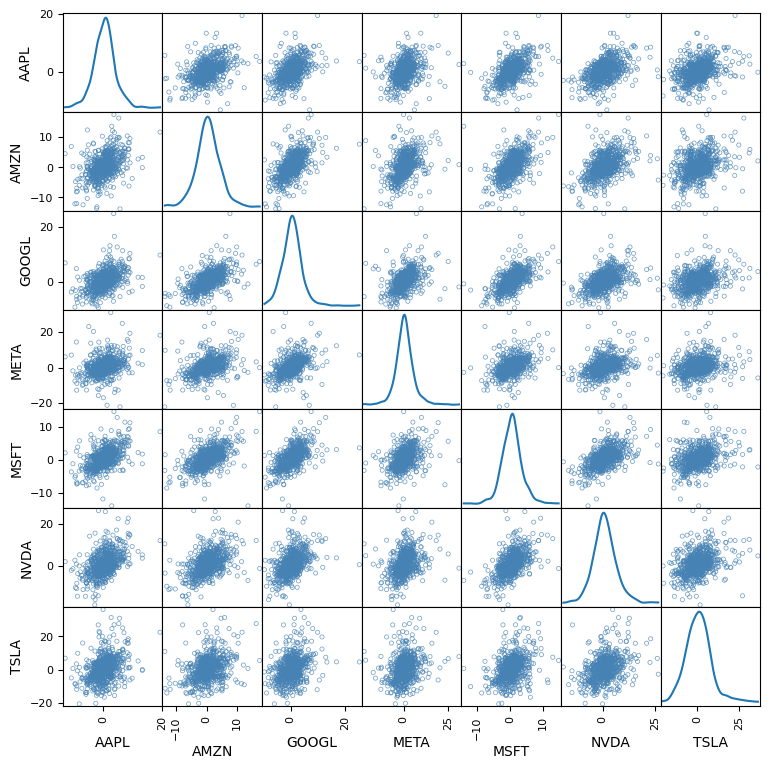

In [37]:
# richards way
from pandas.plotting import scatter_matrix

# Create figure with 7x7 scatter plots. Main diagonal shows kernel density
# for each index.
axes = scatter_matrix(
    df_w_pct,
    figsize=(9, 9),
    alpha=0.8,                  # Set transparency of markers
    color='none',               # Color of markers (no filling)
    edgecolors='steelblue',     # Color of marker edges
    lw=0.5,                     # Width of marker edges
    diagonal='kde',             # Add kernel density estimate to diagonal
)



3.  **[Advanced]**
        In each of the subplots, add a text that reports the pairwise correlation
        for these stocks which you computed earlier.
        (e.g., the correlation between returns on AAPL and AMZN is about 0.42,
        so this text should be added to the subplot showing the 
        scatter plot of AAPL vs. AMZN).

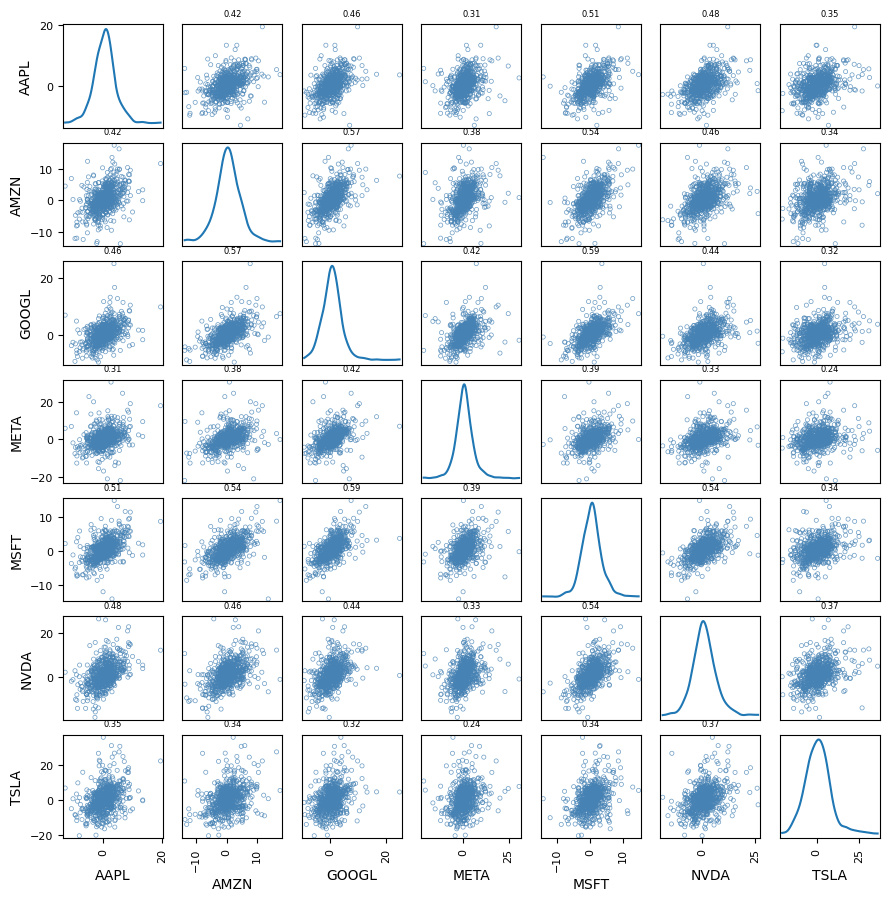

In [39]:
# richards way
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Create figure with 7x7 scatter plots. Main diagonal shows kernel density
# for each index.
axes = scatter_matrix(
    df_w_pct,
    figsize=(9, 9),
    alpha=0.8,                  # Set transparency of markers
    color='none',               # Color of markers (no filling)
    edgecolors='steelblue',     # Color of marker edges
    lw=0.5,                     # Width of marker edges
    diagonal='kde',             # Add kernel density estimate to diagonal
)
plt.tight_layout()
df_corr = df_w_pct.corr().copy()

for i, c1 in enumerate(df_w_pct.columns):
        for j, c2 in enumerate(df_w_pct.columns):
            if i != j:
                axes[i, j].set_title(f'{df_corr.iloc[i,j].round(2)}', fontsize=6)


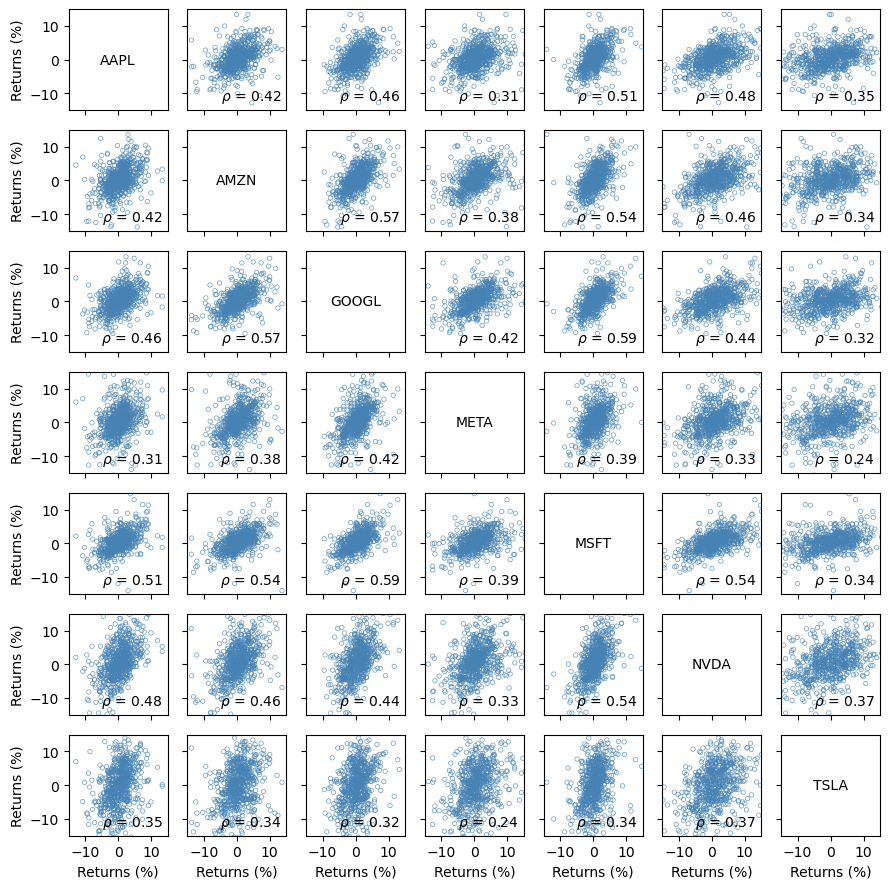

In [65]:
import matplotlib.pyplot as plt

df_returns = df_w_pct.copy()
df_corr = df_w_pct.corr().copy()

# List of tickers present in DataFrame
tickers = df_returns.columns.to_list()

n = len(tickers)

fig, axes = plt.subplots(n, n, figsize=(9, 9), sharex=True, sharey=True)

# Set range for x- and y-axes
xmin, xmax = -15, 15

# Iterate over rows and columns
for i in range(n):
    for j in range(n):

        # Select current axes
        ax = axes[i, j]

        # Add tick labels to the last row and first column
        if i == n - 1:
            ax.set_xlabel('Returns (%)')
        if j == 0:
            ax.set_ylabel('Returns (%)')

        # For diagonal panels, print the index name instead of
        # (exactly diagonal) scatter plot.
        if i == j:
            ax.text(
                0.5, 0.5, tickers[i], transform=ax.transAxes, va='center', ha='center'
            )
            continue

        # Get x- and y-values for this panel
        xvalues = df_returns.iloc[:, j]
        yvalues = df_returns.iloc[:, i]

        # Create scatter plot
        ax.scatter(
            xvalues,
            yvalues,
            s=10,
            alpha=0.8,
            lw=0.5,
            color='none',
            edgecolors='steelblue',
        )

        # Add text with pairwise correlation
        if i != j:
            ax.text(
                0.95,
                0.05,
                rf'$\rho$ = {df_corr.iloc[i, j]:.2f}',
                transform=ax.transAxes,
                va='bottom',
                ha='right',
            )

        # Set uniform x- and y-ticks for all axes
        ax.set_xlim((xmin, xmax))
        ax.set_ylim((xmin, xmax))
        ticks = -10, 0, 10
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)


fig.tight_layout()

***
# Exercise 4: Decade averages of macro time series


For this exercise, you'll be using macroeconomic data from the folder `data/FRED`.

1.  There are five files containing monthly observations on annual inflation (INFLATION), the Fed Funds rate (FEDFUNDS), the labor force participation rate (LFPART), the 1-year real interest rate (REALRATE) and the unemployment rate (UNRATE).

    1.  Write a loop to import these files and store the individual DataFrames in a list.

        *Hint:* Recall from the lecture that you should use 
        `pd.read_csv(..., parse_dates=['DATE'], index_col='DATE')` to automatically parse strings stored in the `DATE` column as dates and set the `DATE`
        column as the index.

    2.  Use 
        [`pd.concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
        to concatenate this list of DataFrames along the column dimension
        using an outer join (`join='outer'`) to obtain a merged data set.

3.  You want to compute the average value of each variable by decade, but you want to include only decades without _any_ missing values for _all_ variables.

    1.  Create a variable `Decade` which stores the decade (1940, 1950, ...) for each observation.

        *Hint:* You should have set the `DATE` as the `DataFrame` index. Then you can access the calendar year using the attribute `df.index.year` which can be used to compute the decade.

    2.  Create an indicator variable which takes on the value `True` 
        whenever all observations (all columns) for a given date are non-missing, and `False`
        if at least one variable has a missing observation. 

    3.  Aggregate this indicator to decades using a
    [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) so that the indicator takes on the value `True` whenever
    _all_ variables in a given decade have no missing values, and `False`
    otherwise.

        *Hint:* You can use the 
        [`all()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.all.html) aggregation for this.

    4.  Merge this decade-level indicator data back into the original `DataFrame` (_many-to-one_ merge). 
4.  Using this indicator, drop all observations which are in a decade with missing values.
5.  Compute the decade average for each variable.

**Challenge**

-   Your pandas guru friend claims that all the steps in 2.2 to 2.4 can be done with a single one-liner using [`transform()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html). Can you come up with a solution?

    

In [117]:
# import files and store df in a list
DATA_PATH = "../../data/FRED"

symbols = ["INFLATION","FEDFUNDS","LFPART","REALRATE","UNRATE"]
lst = []

for symbol in symbols:
    file = f"{DATA_PATH}/{symbol}.csv"
    d = pd.read_csv(file, parse_dates=["DATE"],index_col=["DATE"])
    lst.append(d)

df = pd.concat(lst, axis = 1, join="outer") #axis = 1 to specify coloumn axis
df



,INFLATION,FEDFUNDS,LFPART,REALRATE,UNRATE
DATE,,,,,
1948-01-01,10.2,NaN,58.6,NaN,3.4
1948-02-01,9.5,NaN,58.9,NaN,3.8
1948-03-01,6.8,NaN,58.5,NaN,4.0
1948-04-01,8.3,NaN,59.0,NaN,3.9
1948-05-01,9.4,NaN,58.3,NaN,3.5
...,...,...,...,...,...
2024-09-01,2.4,5.1,62.7,2.4,4.1
2024-10-01,2.6,4.8,62.5,2.2,4.1
2024-11-01,2.7,4.6,62.5,2.1,4.2


In [118]:
#create decade clolumn
year = df.index.year
decade = (year//10)*10 #could also use np.floor()
df["Decade"] = decade

# Verify that Decade variable looks as expected
df['Decade'].value_counts()

Decade
1950    120
1960    120
1970    120
1980    120
1990    120
2000    120
2010    120
2020     61
1940     24
Name: count, dtype: int64

In [119]:
#Create a variable which is true when there are no missing varables on a spesific date
df["Not_na"] = df.notna().all(axis=1) #all.(axis=1) checks each row (date) returning true only if all columns are non-na
df

,INFLATION,FEDFUNDS,LFPART,REALRATE,UNRATE,Decade,Not_na
DATE,,,,,,,
1948-01-01,10.2,NaN,58.6,NaN,3.4,1940,False
1948-02-01,9.5,NaN,58.9,NaN,3.8,1940,False
1948-03-01,6.8,NaN,58.5,NaN,4.0,1940,False
1948-04-01,8.3,NaN,59.0,NaN,3.9,1940,False
1948-05-01,9.4,NaN,58.3,NaN,3.5,1940,False
...,...,...,...,...,...,...,...
2024-09-01,2.4,5.1,62.7,2.4,4.1,2020,True
2024-10-01,2.6,4.8,62.5,2.2,4.1,2020,True
2024-11-01,2.7,4.6,62.5,2.1,4.2,2020,True


In [126]:
#my way

#drops all decades with "not_na" != 1
group = df.groupby("Decade").mean()
group = group.query("Not_na == 1")
group

,INFLATION,FEDFUNDS,LFPART,REALRATE,UNRATE,Not_na
Decade,,,,,,
1990,3.006667,5.140000,66.668333,2.206667,5.762500,1.0
2000,2.568333,2.952500,66.236667,1.023333,5.541667,1.0
2010,1.771667,0.618333,63.295000,-0.732500,6.220833,1.0


In [ ]:
#richards way

# Create indicator for rows with no missing values in the selected variables
no_miss = df[variables].notna().all(axis=1)

# Create indicator for decades with no missing values
no_miss_decade = no_miss.groupby(df['Decade']).all()

# Convert to DataFrame, assign meaningful column name
no_miss_decade = no_miss_decade.to_frame('NotMissing')

# Reset index to move Decade back into columns
no_miss_decade  = no_miss_decade.reset_index()

# Merge back into original data set 
df = df.merge(no_miss_decade, how='left', on='Decade')

# Keep only decades without any missing observations
df_no_miss = df.loc[df['NotMissing']].copy()

print(f'Final number of observations: {len(df_no_miss)}')

# drop NotMissing, don't want averages of these 
df_no_miss = df_no_miss.drop(columns=['NotMissing'])

# Compute decade means
df_no_miss.groupby('Decade').mean()

Final number of observations: 360


,INFLATION,FEDFUNDS,LFPART,REALRATE,UNRATE,NotMissing2
Decade,,,,,,
1990,3.006667,5.140000,66.668333,2.206667,5.762500,1.0
2000,2.568333,2.952500,66.236667,1.023333,5.541667,1.0
2010,1.771667,0.618333,63.295000,-0.732500,6.220833,1.0


2.  Create an indicator variable which takes on the value `True` 
        whenever all observations (all columns) for a given date are non-missing, and `False`
        if at least one variable has a missing observation. 

    3.  Aggregate this indicator to decades using a
    [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) so that the indicator takes on the value `True` whenever
    _all_ variables in a given decade have no missing values, and `False`
    otherwise.

        *Hint:* You can use the 
        [`all()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.all.html) aggregation for this.

    4.  Merge this decade-level indicator data back into the original `DataFrame` (_many-to-one_ merge). 

In [113]:
#one-liner
df["NotMissing2"] = (
    df.groupby("Decade").transform(lambda x: x.isna().sum()).sum(axis=1) == 0
)
df

,INFLATION,FEDFUNDS,LFPART,REALRATE,UNRATE,Decade,NotMissing2
DATE,,,,,,,
1948-01-01,10.2,NaN,58.6,NaN,3.4,1940,False
1948-02-01,9.5,NaN,58.9,NaN,3.8,1940,False
1948-03-01,6.8,NaN,58.5,NaN,4.0,1940,False
1948-04-01,8.3,NaN,59.0,NaN,3.9,1940,False
1948-05-01,9.4,NaN,58.3,NaN,3.5,1940,False
...,...,...,...,...,...,...,...
2024-09-01,2.4,5.1,62.7,2.4,4.1,2020,False
2024-10-01,2.6,4.8,62.5,2.2,4.1,2020,False
2024-11-01,2.7,4.6,62.5,2.1,4.2,2020,False


***
# Exercise 5: Merging additional Titanic data

In this exercise, you'll be working with the the original Titanic data set in `titanic.csv` and additional (partly fictitious) information on passengers stored in `titanic-additional.csv`, both located in the `data/` folder.

The goal of the exercise is to calculate the survival rates by country of residence (for this exercise we restrict ourselves to the UK, so these will be England, Scotland, etc.).

1.  Load the `titanic.csv` and `titanic-additional.csv` into two DataFrames.

    Inspect the columns contained in both data sets. As you can see, the original data contains the full name including the title
    and potentially maiden name (for married women) in a single column.
    The additional data contains this information in separate columns.
    You want to merge these data sets, but you first need to create common keys in both DataFrames.

2.  Since the only common information is the name, you'll need to extract the individual name components from the original DataFrame
    and use these as merge keys.

    Focusing only on men (who have names that are much easier to parse), split the `Name` column into the tokens 
    `Title`, `FirstName` and `LastName`, just like the columns in the second DataFrame.

    *Hint:* This is the same task as in the last exercise in Workshop 2. You can just use your solution here.

3.  Merge the two data sets based on the columns `Title`, `FirstName` and `LastName` you just created using a _left join_ (_one-to-one_ merge).
    Tabulate the columns and the number of non-missing observations to make sure that merging worked. 

    *Note:* The additional data set contains address information only for passengers from the UK, so some of these fields will be missing.

4.  You are now in a position to merge the country of residence (_many-to-one_ merge). Load the country data from `UK_post_codes.csv` which contains 
    the UK post code prefix (which you can ignore), the corresponding city, and the corresponding country.

    Merge this data with your passenger data set using a _left join_ (what is the correct merge key?).

5.  Tabulate the number of observations by `Country`, including the number of observations with missing `Country` (these are passengers residing outside the UK).

    Finally, compute the mean survival rate by country.

In [136]:
DATA_PATH = "../../data/"
df_tit = pd.read_csv(f"{DATA_PATH}titanic.csv")
df_tit_ad = pd.read_csv(f"{DATA_PATH}titanic-additional.csv")

In [130]:
df_tit

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C


In [131]:
df_tit_ad

,Title,LastName,FirstName,MaidenName,City,Postcode,Address
0,Mr.,Christmann,Emil,NaN,Chester,CH6 34H,3 Graham ways
1,Miss,Heikkinen,Laina,NaN,Bolton,BL0 1XG,0 Griffin wells
2,Lady.,Duff Gordon,Lucille Christiana,Sutherland,NaN,NaN,NaN
3,Miss,Pettersson,Ellen Natalia,NaN,Northampton,NN0 H5R,889 Murray glen
4,Mr.,Odahl,Nils Martin,NaN,Derby,DE7 QZ7,"Studio 2, Long courts"
...,...,...,...,...,...,...,...
886,Miss,Mullens,"Katherine ""Katie""",NaN,Kingston upon Thames,KT1 ONA,"Flat 88n, Lee shoal"
887,Mr.,Homer,Harry,NaN,NaN,NaN,NaN
888,Mr.,Beesley,Lawrence,NaN,Derby,DE7 PYH,"Studio 52, Macdonald forest"
889,Mr.,Smith,James Clinch,NaN,NaN,NaN,NaN


In [ ]:
#restrict the df to only men

#alt 1: query
df_tit_m = df_tit.query("Sex=='male'").copy()
#alt 2: loc
df_tit_m = df_tit.loc[df_tit['Sex']=='male'].copy()

df_tit_m

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master Gosta Leonard",male,2.0,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C


In [141]:
# Split names by comma, create DataFrame with a column for each token
names = df_tit_m['Name'].str.partition(',')
names

,0,1,2
0,Braund,",",Mr. Owen Harris
4,Allen,",",Mr. William Henry
5,Moran,",",Mr. James
6,McCarthy,",",Mr. Timothy J
7,Palsson,",",Master Gosta Leonard
...,...,...,...
883,Banfield,",",Mr. Frederick James
884,Sutehall,",",Mr. Henry Jr
886,Montvila,",",Rev. Juozas
889,Behr,",",Mr. Karl Howell
